Dataset Head:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4 

Summary Statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000 

Categorical Variable Counts:
sex       2
smoker    2
day       4
time      2
dtype: int64 



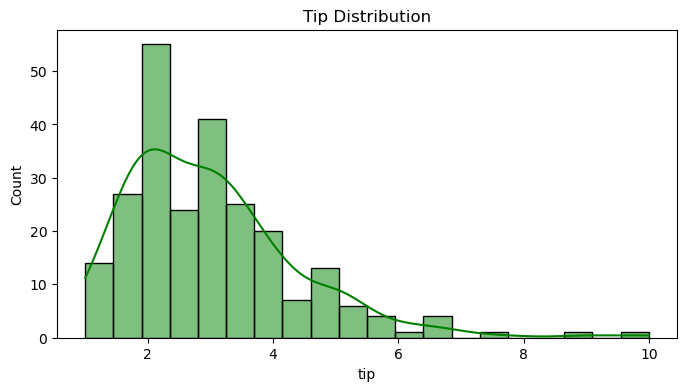

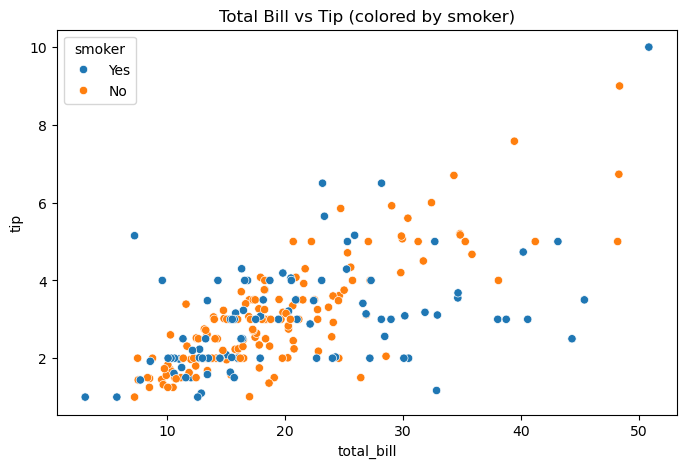

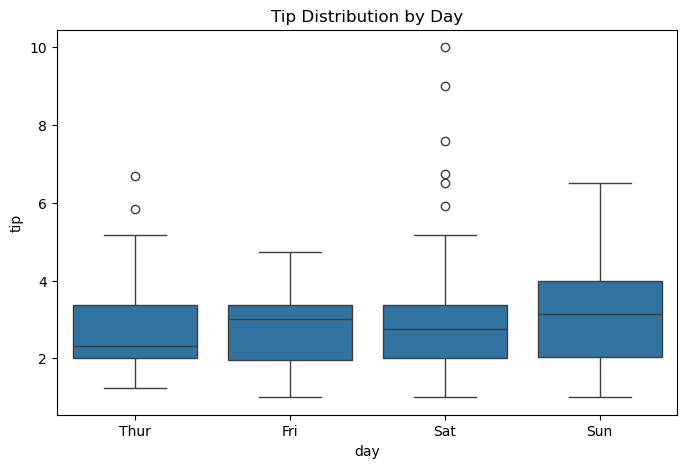

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load dataset
tips = sns.load_dataset('tips')

# EDA

print("Dataset Head:")
print(tips.head(), "\n")

print("Summary Statistics:")
print(tips.describe(), "\n")

print("Categorical Variable Counts:")
print(tips[['sex', 'smoker', 'day', 'time']].nunique(), "\n")

# Distribution of tip
plt.figure(figsize=(8, 4))
sns.histplot(tips['tip'], bins=20, kde=True, color='green')
plt.title('Tip Distribution')
plt.show()

# Scatter plot: total_bill vs tip
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker')
plt.title('Total Bill vs Tip (colored by smoker)')
plt.show()

# Boxplot for day vs tip
plt.figure(figsize=(8, 5))
sns.boxplot(data=tips, x='day', y='tip')
plt.title('Tip Distribution by Day')
plt.show()

# Feature engineering: encode categorical variables
tips_encoded = tips.copy()
tips_encoded['sex'] = tips_encoded['sex'].map({'Male': 0, 'Female': 1})
tips_encoded['smoker'] = tips_encoded['smoker'].map({'No': 0, 'Yes': 1})
tips_encoded['day'] = tips_encoded['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
tips_encoded['time'] = tips_encoded['time'].map({'Lunch': 0, 'Dinner': 1})

# Define features and target
X = tips_encoded[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tips_encoded['tip']


Linear Regression Performance (5-Fold CV):
Average R2 Score: 0.4278
Average MSE: 1.1119

Final Evaluation on Test Set (Linear Regression):
MSE: 0.6963
R2 Score: 0.4429


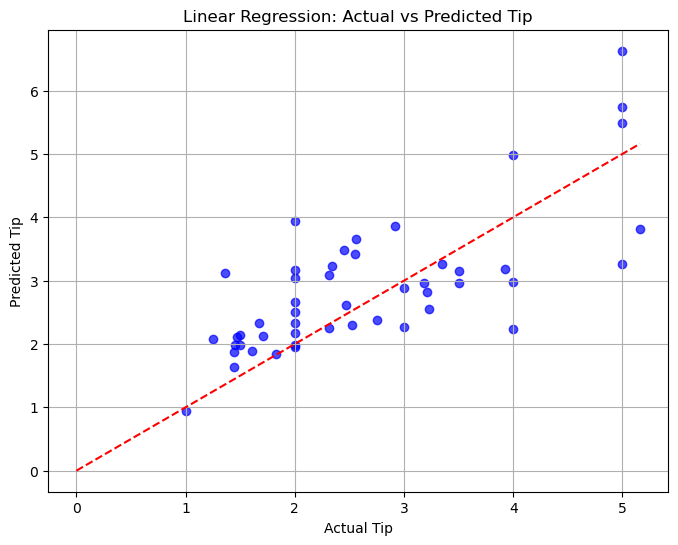

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
linear_model = LinearRegression()

# Cross-validation scores
cv_r2 = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
cv_mse = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Linear Regression Performance (5-Fold CV):")
print(f"Average R2 Score: {cv_r2.mean():.4f}")
print(f"Average MSE: {-cv_mse.mean():.4f}\n")

# Train and predict
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Evaluate test set
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Final Evaluation on Test Set (Linear Regression):")
print(f"MSE: {test_mse:.4f}")
print(f"R2 Score: {test_r2:.4f}")

# Plot Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.title('Linear Regression: Actual vs Predicted Tip')
plt.grid(True)
plt.show()


Dataset shape: (244, 7)
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2

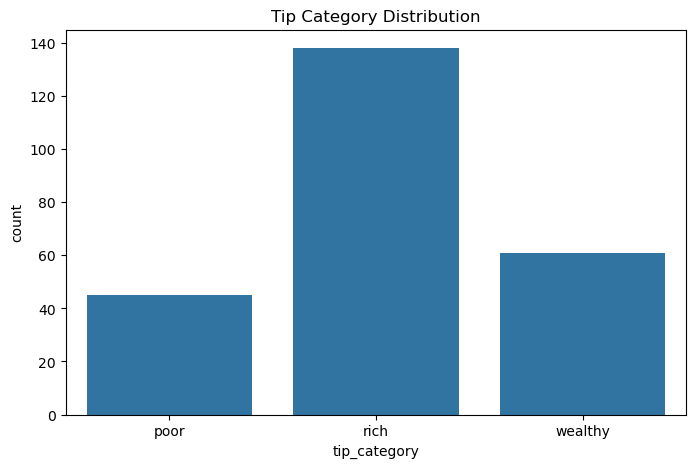


CV Accuracy: 0.646 ± 0.082

Test Accuracy: 0.7755

Classification Report:
               precision    recall  f1-score   support

        poor       1.00      0.67      0.80         9
        rich       0.74      0.93      0.83        28
     wealthy       0.75      0.50      0.60        12

    accuracy                           0.78        49
   macro avg       0.83      0.70      0.74        49
weighted avg       0.79      0.78      0.77        49



In [9]:
# 1. Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib

# 2. Load the Seaborn tips dataset
tips = sns.load_dataset("tips")

# 3. Explore dataset
print("Dataset shape:", tips.shape)
print(tips.head())
print(tips.describe())
print(tips.info())

# 4. Create tip category: poor, rich, wealthy
low_thresh = tips['tip'].quantile(0.25)   # 25% = 2.0
high_thresh = tips['tip'].quantile(0.75)  # 75% = 3.56

def categorize_tip(tip):
    if tip < low_thresh:
        return 'poor'
    elif tip <= high_thresh:
        return 'rich'
    else:
        return 'wealthy'

tips['tip_category'] = tips['tip'].apply(categorize_tip)
print("\nTip Category Counts:\n", tips['tip_category'].value_counts())

# 5. Visualize tip categories
plt.figure(figsize=(8, 5))
sns.countplot(data=tips, x='tip_category')
plt.title('Tip Category Distribution')
plt.show()

# 6. Features and target
X = tips.drop(columns=['tip', 'tip_category'])
y = tips['tip_category']

# 7. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 8. Preprocessing pipeline
numeric_features = ['total_bill', 'size']
categorical_features = ['sex', 'smoker', 'day', 'time']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# 9. Define pipeline with Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 10. Train and evaluate the model
# Cross-validation
cv_scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=5)
print(f"\nCV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Train on full training set
logreg_pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred = logreg_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
